<h1>PAD LAB - Experiment 2</h1>
<h3>Roshan Srivastava J047 MBA Tech. EXTC SEM 7</h3>

<p>Aim: To hardcode PCA, and to try out PCA on LFW dataset and make a classification model</p>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
data = pd.read_csv("iris_data.csv") #reading the data file
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data[["sepal_length","sepal_width","petal_length","petal_width"]] #seperating 
y = data['species']

In [ ]:
X.head(), y.head()  #viewing the dataset

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2, 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: species, dtype: object)

In [ ]:
dims = X.T #converting row to columns

In [ ]:
covariance = np.cov(dims)
eigVal,eigVec = np.linalg.eig(covariance) #calculating covariance and eigenvalues, eigenvectors

In [ ]:
print(eigVec,eigVal,covariance)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]] [4.22484077 0.24224357 0.07852391 0.02368303] [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [ ]:
first_proj = X.dot(eigVec.T[0]) #transpose required for more than 1 entries of the vector
print(first_proj)

0      2.827136
1      2.795952
2      2.621524
3      2.764906
4      2.782750
         ...   
145    7.455360
146    7.037007
147    7.275389
148    7.412972
149    6.901009
Length: 150, dtype: float64


In [ ]:
data_pca = pd.DataFrame(first_proj,columns=['projected']) #creating projections of our data
data_pca['output'] = 0.0
data_pca['class'] = y
data_pca

,projected,output,class
0,2.827136,0.0,Iris-setosa
1,2.795952,0.0,Iris-setosa
2,2.621524,0.0,Iris-setosa
3,2.764906,0.0,Iris-setosa
4,2.782750,0.0,Iris-setosa
...,...,...,...
145,7.455360,0.0,Iris-virginica
146,7.037007,0.0,Iris-virginica
147,7.275389,0.0,Iris-virginica
148,7.412972,0.0,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Projected Samples')

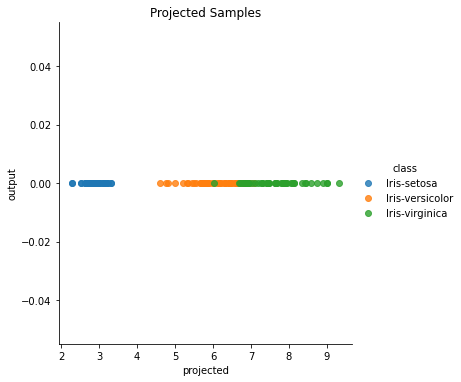

In [ ]:
sns.lmplot("projected",'output',data_pca, fit_reg=False,hue='class') #fit_reg used for regression line, not needed here
plt.title("Projected Samples")
#output shows good seperation for blue, but not for green and orange classes

In [71]:
lfw = fetch_lfw_people(min_faces_per_person=75)
_,height,width = lfw.images.shape #importing LFW data

In [72]:
X = lfw.data
y = lfw.target

In [73]:
X.shape, y.shape, height, width

((1217, 2914), (1217,), 62, 47)

In [74]:
names = lfw.target_names #preprocessing

In [75]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=30) #train-test-split

In [76]:
pca = PCA(n_components = 100,whiten=True).fit(X_train)
X_train_proj = pca.transform(X_train)
X_test_proj = pca.transform(X_test) #transforming data as per requirements

In [77]:
clf = MLPClassifier(hidden_layer_sizes=(1024,),batch_size=256,verbose=True,early_stopping=True).fit(X_train_proj,y_train) #training the model

Iteration 1, loss = 1.62840452
Validation score: 0.529412
Iteration 2, loss = 1.11878607
Validation score: 0.630252
Iteration 3, loss = 0.84164259
Validation score: 0.739496
Iteration 4, loss = 0.63946903
Validation score: 0.831933
Iteration 5, loss = 0.50637351
Validation score: 0.831933
Iteration 6, loss = 0.40161781
Validation score: 0.831933
Iteration 7, loss = 0.32654746
Validation score: 0.831933
Iteration 8, loss = 0.27132384
Validation score: 0.831933
Iteration 9, loss = 0.22624815
Validation score: 0.865546
Iteration 10, loss = 0.19018956
Validation score: 0.873950
Iteration 11, loss = 0.16100038
Validation score: 0.882353
Iteration 12, loss = 0.13819503
Validation score: 0.882353
Iteration 13, loss = 0.12045078
Validation score: 0.882353
Iteration 14, loss = 0.10568003
Validation score: 0.882353
Iteration 15, loss = 0.09251049
Validation score: 0.882353
Iteration 16, loss = 0.08115223
Validation score: 0.882353
Iteration 17, loss = 0.07216370
Validation score: 0.882353
Iterat

In [78]:
y_pred = clf.predict(X_test_proj)
print(classification_report(y_test,y_pred,target_names = names)) #predicting and making a classification model

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00         5
     Colin Powell       0.75      1.00      0.86         3
  Donald Rumsfeld       1.00      1.00      1.00         4
    George W Bush       0.88      1.00      0.93         7
Gerhard Schroeder       1.00      1.00      1.00         4
       Tony Blair       1.00      0.71      0.83         7

         accuracy                           0.93        30
        macro avg       0.94      0.95      0.94        30
     weighted avg       0.95      0.93      0.93        30



In [79]:
def plot_faces(images,titles,h,w,rows=3,cols=4):
  plt.figure(figsize=(10,10))
  for j in range(rows*cols):
    plt.subplot(rows,cols,j+1)
    plt.imshow(images[j].reshape((h,w)),cmap='gray')
    plt.title(titles[j])
    plt.xticks(())
    plt.yticks(())
  
def titles(y_pred,y_test,names):
  for j in range(y_pred.shape[0]):
    pred_names = names[y_pred[j]].split(' ')[-1]
    actual_names = names[y_test[j]].split(' ')[-1]
    yield f'Predicted: {pred_names}\nActual: {actual_names}'


In [80]:
predicted_names = list(titles(y_pred,y_test,names))

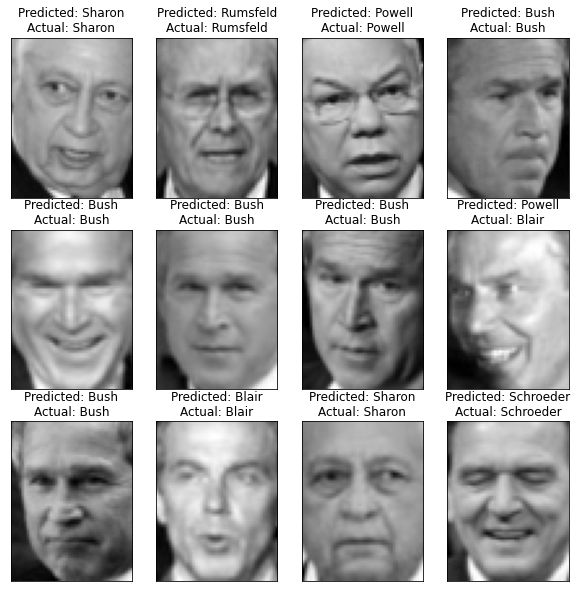

In [81]:
plot_faces(X_test,predicted_names,height,width)

<h1>Conclusion<h1>
<ol>
<li>
For the given iris dataset, hard coding of PCA was done, 4 dimensions were converted to 1 dimension, all 150 samples were projected on 1 dimension, got good seperability for one class, and worse seperability for the other 2 classes.
</li>
<li>
PCL is applied to LFW dataset by choosing top 100 principal components. Projected samples were classified using neural network which gives 90% accuracy for 100 min faces, and 93% for mn faces = 75.
</li>
</ol>